# Introduction to Machine Learning
### By **[NimbleBox](https://www.nimblebox.ai)**


[<img src="./assets/nbx.jpeg" alt="NimbleBox.ai logo" width="600"/>](https://www.nimblebox.ai)



## What will we learn 
 
Today we will learn about Transfer Learning in the field of image classification with the help of a convolutional neural network and what exactly it is, as the name defines that we transfer the learnings of one model to another. How is that possible? We will see in this notebook. Before we directly jump into implementing this we will need to understand some things. Let us see what they are. 


## Architecture
 
So as the case was with neural networks that you could increase the hidden layers or the number of neurons in the hidden layers or change the activation function and you created a different architecture exactly like that Convolutional neural networks also had some major breakthrough one of them is **ResNet** On the basic level it is still a CNN but does some of the extra things, we are not exactly going to convert what ResNet is or what problems did it solve but if you are interested in it you can read the [ResNet paper](https://arxiv.org/abs/1512.03385) by Kaiming He, Xiangyu Zhang, Shaoqing Ren and Jian Sun. 


## Transfer Learning 
 
Transfer learning is used to solve problems where you have a small dataset to train your network and as you know to perform any good deep learning models need huge amounts of data so what transfer learning does is that when you have similar types of problem and you have huge amounts of data not specific to your problem but a similar one you can train your network on that problem and save the weights for all the layers except the last one as the last layer is the classification layer and reuse the same network for your own problem generally by only changing the last layer and freezing all the other parameters or adding some extra layers and training only those extra layers, by freezing parameters we mean that we will not update the weights of the layers before the classification layer and they will use the same parameters that were used to solve the previous problem. 
 
<img src="./assets/transfer.jpeg" width=800 />
 
> Image from [topbots](https://www.topbots.com/transfer-learning-in-nlp/)
 
As we can see in the above image the model used in the previous task is transferred with and used by just changing the head which is just another name for the classification part of the neural network.


## Implementation 
 
For this implementation we are going to use a pretrained ResNet model, by pretrained we mean that the network is already trained on some huge dataset and in the computer vision community it is easy to assume that when someone talks about a pre trained CNN they are saying that it was trained on the ImageNet dataset of which you can learn more about [here](http://image-net.org/about-overview).

We are going to use the [hymenoptera dataset](https://www.kaggle.com/ajayrana/hymenoptera-data) version 1 from kaggle by [ajayrana](https://www.kaggle.com/ajayrana) which contains photos of ants and bees so at the end you will be able to classify them with good accuracy even when you have such less photos in each class here class just means the individual catageroies that you want to classify in our case class is equal to 2.  
 
And to complete this task we are going to use a library called [tensorflow](https://www.tensorflow.org/)


In [7]:
# Importing Prerequisites.
import tensorflow as tf
from tensorflow import keras
import os
 
# Path to the dataset.
PATH = r'./assets/data'
 
# Preprocessing for the model that we are using which is Resnet50
# which just means that it is a ResNet model with 50 layers.
train_datagen = keras.preprocessing.image.ImageDataGenerator(keras.applications.resnet50.preprocess_input)
val_datagen = keras.preprocessing.image.ImageDataGenerator(keras.applications.resnet50.preprocess_input)
 
# Training generator which eases the loading and supplying of the data. 
train_gen = train_datagen.flow_from_directory(os.path.join(PATH, "train"),
                                              target_size = (224, 224),
                                              color_mode = "rgb",
                                              batch_size = 32,
                                              class_mode = "categorical",
                                              shuffle = True)
 
# Validation generator which eases the loading and supplying of the data.
val_gen = val_datagen.flow_from_directory(os.path.join(PATH, "val"),
                                              target_size = (224, 224),
                                              color_mode = "rgb",
                                              batch_size = 32,
                                              class_mode = "categorical",
                                              shuffle = False)
 
# Assigning ResNet50 without the top which just means that we are not
# using the stock classification layer but will be making our own. 
base_model = keras.applications.ResNet50(weights = "imagenet",
                                         include_top = False)
 
# Here we build our custom classifier which has two output units,
# one for ants and the other for bees.
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation = "relu")(x)
x = keras.layers.Dense(512, activation = "relu")(x)
preds = keras.layers.Dense(2, activation = "softmax")(x)  
 
# Here we define our modified model with the inputs and outputs.
model = keras.models.Model(inputs= base_model.input,
                           outputs = preds)
 
# Here we define the type of loss, optimizer and metrics to use. 
model.compile(optimizer = "Adam",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])
 
# Starting the training while supplying train and 
# validation generators with the number of epochs and the step size per epoch. 
history = model.fit_generator(generator = train_gen,
                              validation_data = val_gen,
                              steps_per_epoch = train_gen.n//train_gen.batch_size,
                              epochs = 10)


Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Epoch 1/10
7/7 [==============================] - 49s 7s/step - loss: 1.2653 - accuracy: 0.6462 - val_loss: 17.6126 - val_accuracy: 0.6209
Epoch 2/10
7/7 [==============================] - 53s 8s/step - loss: 0.2960 - accuracy: 0.8774 - val_loss: 129.1788 - val_accuracy: 0.5425
Epoch 3/10
7/7 [==============================] - 50s 7s/step - loss: 0.3520 - accuracy: 0.9292 - val_loss: 5803.1191 - val_accuracy: 0.5686
Epoch 4/10
7/7 [==============================] - 52s 7s/step - loss: 0.4098 - accuracy: 0.8538 - val_loss: 80.2302 - val_accuracy: 0.5556
Epoch 5/10
7/7 [==============================] - 53s 8s/step - loss: 0.2224 - accuracy: 0.9018 - val_loss: 928.8162 - val_accuracy: 0.4575
Epoch 6/10
7/7 [==============================] - 50s 7s/step - loss: 0.1596 - accuracy: 0.9481 - val_loss: 9333.9756 - val_accuracy: 0.4575
Epoch 7/10
7/7 [==============================] - 53s 8s/step - loss: 0.3136 -

Let's plot our training curves, which is basically the plot of accuracy and loss with respect to the number of epochs. 

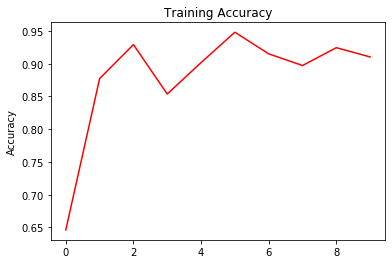

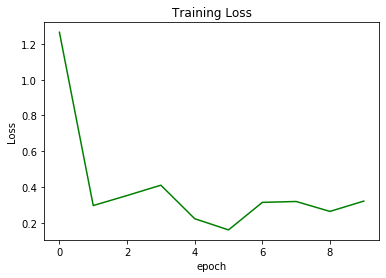

In [10]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, color="r",label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, color="g", label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()